In [1]:
# importing the libraries
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importing the dataset 
df=pd.read_csv('Automobile_data.csv')

In [3]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [4]:
df.shape

(205, 26)

In [5]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [6]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19    3.4               10.0        102     5500        24           30   
4  3.19    3.4                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

In [7]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
# to check for the null values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
df1=df.copy()
# seperating numerical and cat columns

In [11]:
df_num=df1.select_dtypes(include='number')
df_num.head()

symboling  wheel-base  length  width  height  curb-weight  engine-size  \
0          3        88.6   168.8   64.1    48.8         2548          130   
1          3        88.6   168.8   64.1    48.8         2548          130   
2          1        94.5   171.2   65.5    52.4         2823          152   
3          2        99.8   176.6   66.2    54.3         2337          109   
4          2        99.4   176.6   66.4    54.3         2824          136   

   compression-ratio  city-mpg  highway-mpg  
0                9.0        21           27  
1                9.0        21           27  
2                9.0        19           26  
3               10.0        24           30  
4                8.0        18           22

In [12]:
df_cat=df1.select_dtypes(include='object')
df_cat.head()

normalized-losses         make fuel-type aspiration num-of-doors  \
0                 ?  alfa-romero       gas        std          two   
1                 ?  alfa-romero       gas        std          two   
2                 ?  alfa-romero       gas        std          two   
3               164         audi       gas        std         four   
4               164         audi       gas        std         four   

    body-style drive-wheels engine-location engine-type num-of-cylinders  \
0  convertible          rwd           front        dohc             four   
1  convertible          rwd           front        dohc             four   
2    hatchback          rwd           front        ohcv              six   
3        sedan          fwd           front         ohc             four   
4        sedan          4wd           front         ohc             five   

  fuel-system  bore stroke horsepower peak-rpm  price  
0        mpfi  3.47   2.68        111     5000  13495  
1        mpfi  3.47   2.68        111     5000  16500  
2        mpfi  2.68   3.47        154     5000  16500  
3        mpfi  3.19    3.4        102     5500  13950  
4        mpfi  3.19    3.4        115     5500  17450

In [13]:
# if the numerical columns are coming as a object datatype we have to see whether
# there are some weird values in that columns or not.like #@?

In [14]:
# to find the unique values
for i in df_cat.columns:
    print(i,df_cat[i].unique())
    print('*******************************************************************')

normalized-losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
*******************************************************************
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
*******************************************************************
fuel-type ['gas' 'diesel']
*******************************************************************
aspiration ['std' 'turbo']
*******************************************************************
num-of-doors ['two' 'four' '?']
*******************************************************************
body-style ['convertible' 'hatc

In [15]:
for i in df_num.columns:
    print(i,df_num[i].unique())
    print('*******************************************************************')

symboling [ 3  1  2  0 -1 -2]
*******************************************************************
wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]
*******************************************************************
length [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8]
**********************************

In [16]:
### dealing with ?
df1.replace('?',np.nan,inplace=True)

In [17]:
df1.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [18]:
# converting to number dtype
#normalized-losses,bore,stroke,horsepower,peak-rpm,price

In [19]:
df1['normalized-losses']=df1['normalized-losses'].astype('float64')

In [20]:
df1['bore']=df1['bore'].astype('float64')
df1['stroke']=df1['stroke'].astype('float64')
df1['horsepower']=df1['horsepower'].astype('float64')
df1['peak-rpm']=df1['peak-rpm'].astype('float64')
df1['price']=df1['price'].astype('float64')


In [21]:
df_num=df1.select_dtypes(include='number')
df_num.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [22]:
df_cat=df1.select_dtypes(include='object')
df_cat.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [23]:
df_num.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [24]:
df_cat.isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

symboling               Axes(0.125,0.712609;0.168478x0.167391)
normalized-losses    Axes(0.327174,0.712609;0.168478x0.167391)
wheel-base           Axes(0.529348,0.712609;0.168478x0.167391)
length               Axes(0.731522,0.712609;0.168478x0.167391)
width                   Axes(0.125,0.511739;0.168478x0.167391)
height               Axes(0.327174,0.511739;0.168478x0.167391)
curb-weight          Axes(0.529348,0.511739;0.168478x0.167391)
engine-size          Axes(0.731522,0.511739;0.168478x0.167391)
bore                     Axes(0.125,0.31087;0.168478x0.167391)
stroke                Axes(0.327174,0.31087;0.168478x0.167391)
compression-ratio     Axes(0.529348,0.31087;0.168478x0.167391)
horsepower            Axes(0.731522,0.31087;0.168478x0.167391)
peak-rpm                    Axes(0.125,0.11;0.168478x0.167391)
city-mpg                 Axes(0.327174,0.11;0.168478x0.167391)
highway-mpg              Axes(0.529348,0.11;0.168478x0.167391)
price                    Axes(0.731522,0.11;0.168478x0.

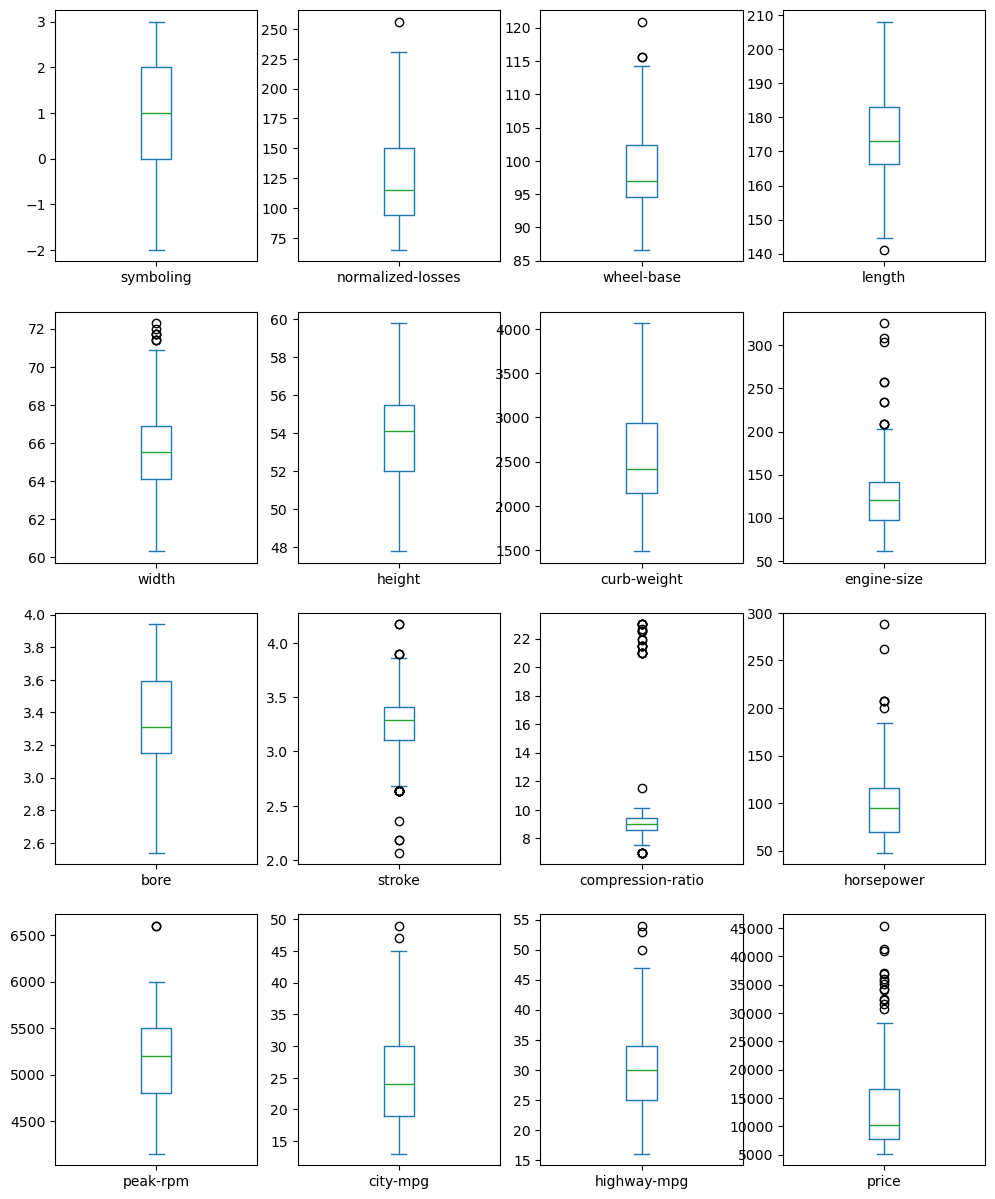

In [25]:
df_num.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,15))

In [26]:
# treating the missing vLUES :
lst=['normalized-losses','bore','stroke','horsepower','peak-rpm','price']

In [27]:
for i in lst:
    df1[i]=df1[i].fillna(df1[i].median())    

In [28]:
df1.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [29]:
df1['num-of-doors'].mode()

0    four
Name: num-of-doors, dtype: object

In [30]:
df1['num-of-doors']=df1['num-of-doors'].fillna('four')

In [31]:
df1.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

symboling               Axes(0.125,0.712609;0.168478x0.167391)
normalized-losses    Axes(0.327174,0.712609;0.168478x0.167391)
wheel-base           Axes(0.529348,0.712609;0.168478x0.167391)
length               Axes(0.731522,0.712609;0.168478x0.167391)
width                   Axes(0.125,0.511739;0.168478x0.167391)
height               Axes(0.327174,0.511739;0.168478x0.167391)
curb-weight          Axes(0.529348,0.511739;0.168478x0.167391)
engine-size          Axes(0.731522,0.511739;0.168478x0.167391)
bore                     Axes(0.125,0.31087;0.168478x0.167391)
stroke                Axes(0.327174,0.31087;0.168478x0.167391)
compression-ratio     Axes(0.529348,0.31087;0.168478x0.167391)
horsepower            Axes(0.731522,0.31087;0.168478x0.167391)
peak-rpm                    Axes(0.125,0.11;0.168478x0.167391)
city-mpg                 Axes(0.327174,0.11;0.168478x0.167391)
highway-mpg              Axes(0.529348,0.11;0.168478x0.167391)
price                    Axes(0.731522,0.11;0.168478x0.

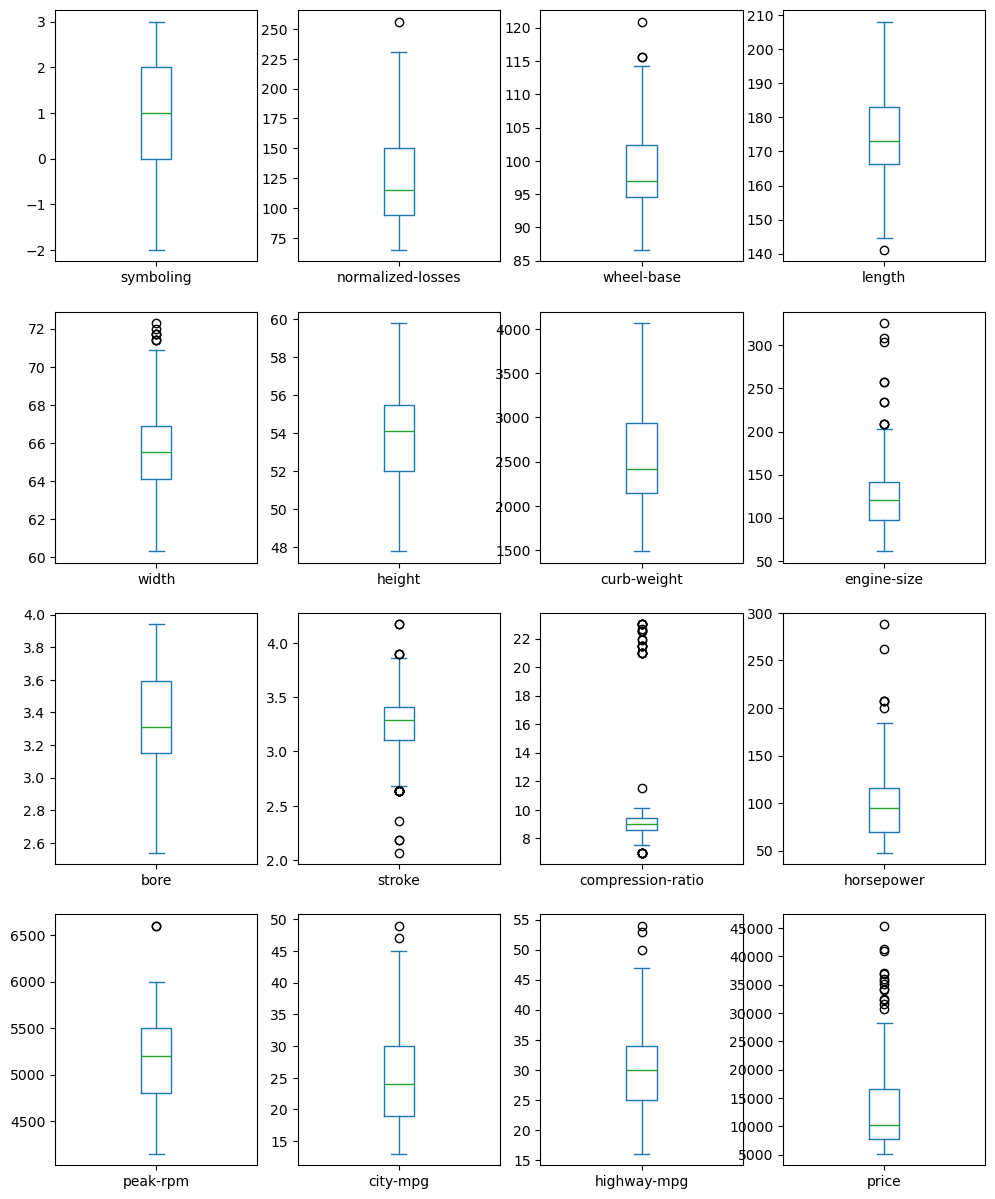

In [32]:
### outlier removal :
df_num.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,15))

<Axes: ylabel='price'>

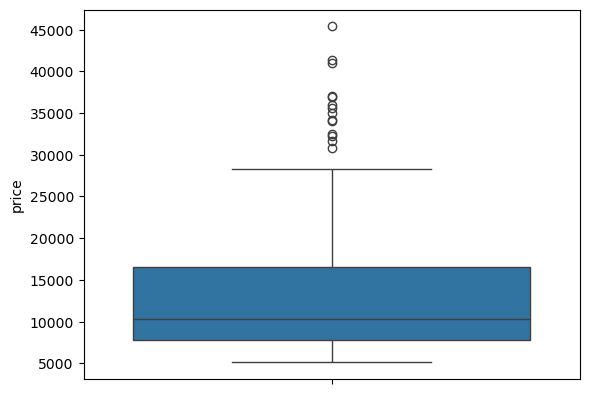

In [33]:
import seaborn as sns
plt.figure()
sns.boxplot(df1['price'])

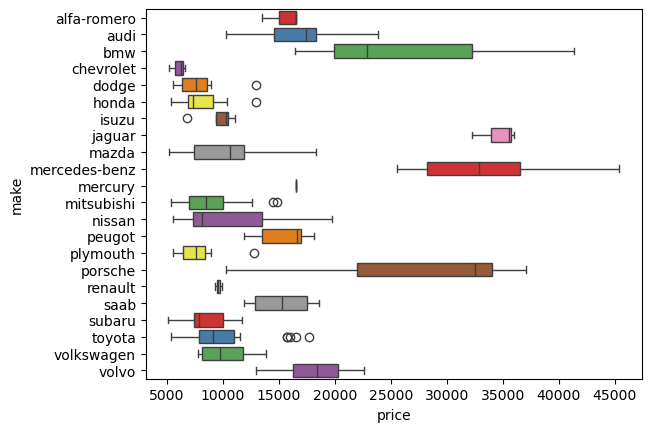

In [34]:
import seaborn as sns
plt.figure()
sns.boxplot(data=df1,x='price',y='make',palette='Set1')
plt.show()

In [35]:
df1[(df1['price']>10000) & (df1['make']=='dodge')]

symboling  normalized-losses   make fuel-type aspiration num-of-doors  \
29          3              145.0  dodge       gas      turbo          two   

   body-style drive-wheels engine-location  wheel-base  length  width  height  \
29  hatchback          fwd           front        95.9   173.2   66.3    50.2   

    curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  \
29         2811         ohc             four          156         mfi   3.6   

    stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
29     3.9                7.0       145.0    5000.0        19           24   

      price  
29  12964.0

In [36]:
df1.drop(29,axis=0,inplace=True)

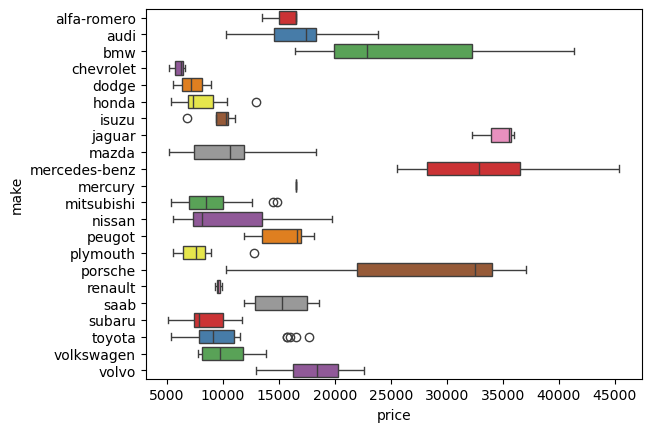

In [37]:
import seaborn as sns
plt.figure()
sns.boxplot(data=df1,x='price',y='make',palette='Set1')
plt.show()

In [38]:
# to remove all the outliers in one go using for loop
for i in df['make'].unique():  # comany names
    #print(i)
    price=df1[df1['make']==i]['price']
    q1=np.quantile(price,0.25)
    q3=np.quantile(price,0.75)
    IQR=q3-q1
    # print(IQR)
    ub=q3+1.5*IQR
    lb=q1-1.5*IQR
    index=price[price>ub].index
    index2=price[price<lb].index
    #print(index)
    if len(index)!=0:
        df1.drop(index,inplace=True)
    if len(index2)!=0:
        df1.drop(index2,inplace=True)  
    
    

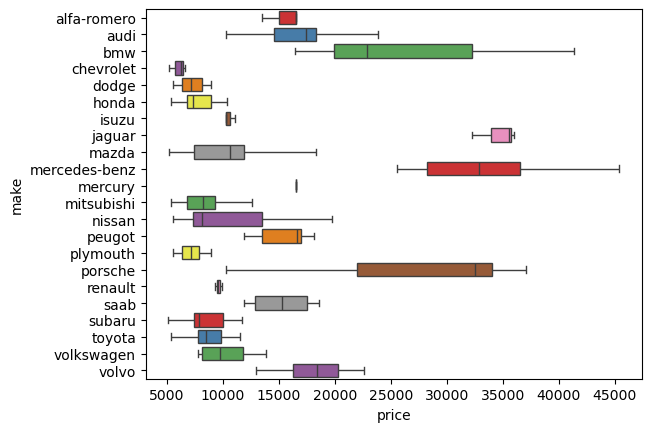

In [39]:
import seaborn as sns
plt.figure()
sns.boxplot(data=df1,x='price',y='make',palette='Set1')
plt.show()

In [40]:
# for i in df_num:
#     q1 q3 iqr ub lb 
# dont take price column

In [41]:
#### 
# importing the data
# misssing value treatment
# outlier removal ==price
# skewness and scaling  for numerical columns
# label encoding for categoricaL COL

In [42]:
df1.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              115.0  alfa-romero       gas        std   
1          3              115.0  alfa-romero       gas        std   
2          1              115.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0          two  convertible          rwd           front        88.6   168.8   
1          two  convertible          rwd           front        88.6   168.8   
2          two    hatchback          rwd           front        94.5   171.2   
3         four        sedan          fwd           front        99.8   176.6   
4         four        sedan          4wd           front        99.4   176.6   

   width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0   64.1    48.8         2548        dohc             four          130   
1   64.1    48.8         2548        dohc             four          130   
2   65.5    52.4         2823        ohcv              six          152   
3   66.2    54.3         2337         ohc             four          109   
4   66.4    54.3         2824         ohc             five          136   

  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        mpfi  3.47    2.68                9.0       111.0    5000.0   
1        mpfi  3.47    2.68                9.0       111.0    5000.0   
2        mpfi  2.68    3.47                9.0       154.0    5000.0   
3        mpfi  3.19    3.40               10.0       102.0    5500.0   
4        mpfi  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg    price  
0        21           27  13495.0  
1        21           27  16500.0  
2        19           26  16500.0  
3        24           30  13950.0  
4        18           22  17450.0

In [43]:
# diving df1 into num and categorical data
df_num=df1.select_dtypes(include='number')
df_cat=df1.select_dtypes(include='object')

In [44]:
df_num.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [45]:
df_cat.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

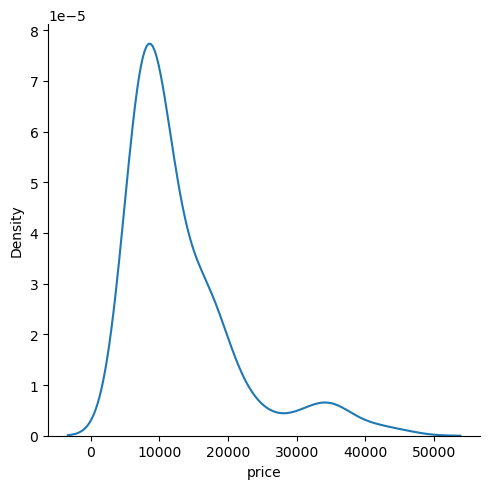

In [46]:
### handle skewness and do scaling
sns.displot(df_num['price'],kind='kde')

In [47]:
#To handle skewness we can use either sqrt transformation or log transformation
from scipy.stats import skew
print(skew(df_num['price']))
print(skew(np.sqrt(df_num['price'])))
print(skew(np.log(df_num['price'])))

1.8222833048465967
1.2728923264530636
0.754550319520299


<Figure size 640x480 with 0 Axes>

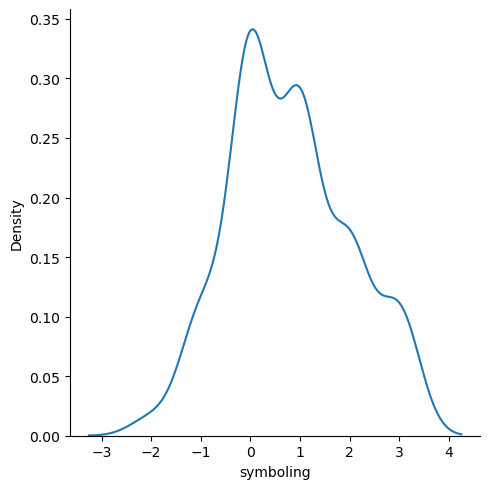

0.21386866184357742


<Figure size 640x480 with 0 Axes>

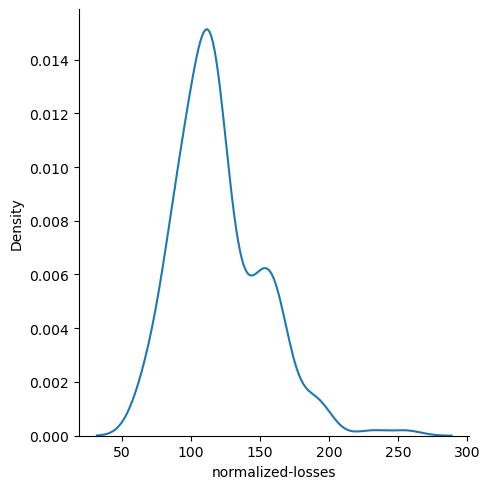

0.9632059441735282


<Figure size 640x480 with 0 Axes>

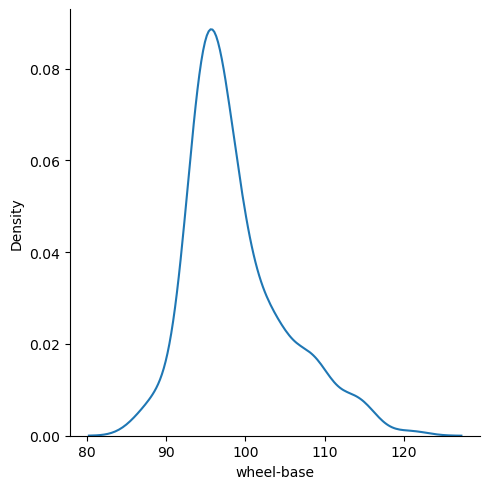

1.0433675972095555


<Figure size 640x480 with 0 Axes>

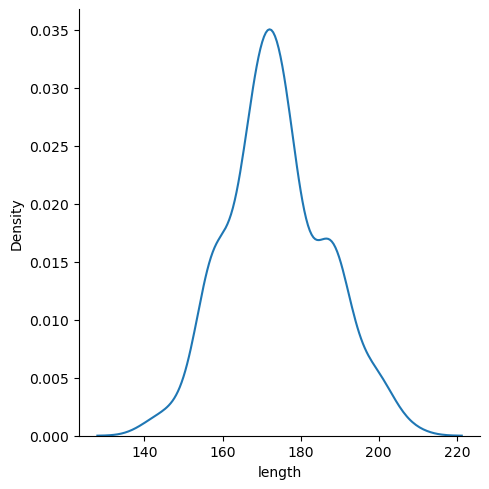

0.1902654850922912


<Figure size 640x480 with 0 Axes>

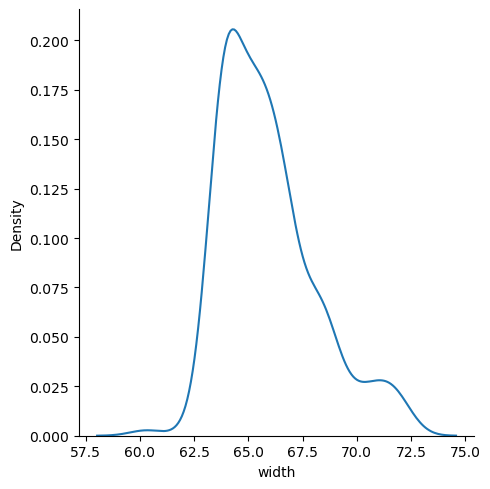

0.9470324898963965


<Figure size 640x480 with 0 Axes>

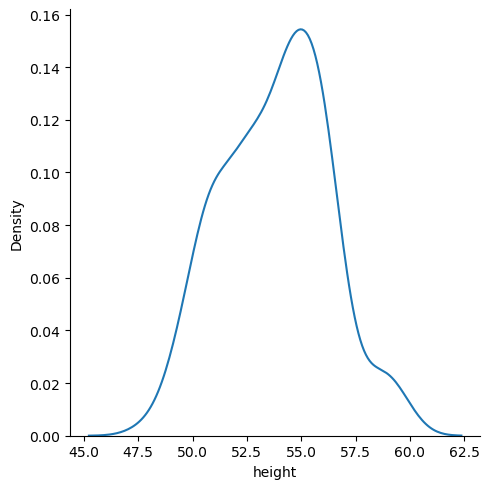

0.021147731594083348


<Figure size 640x480 with 0 Axes>

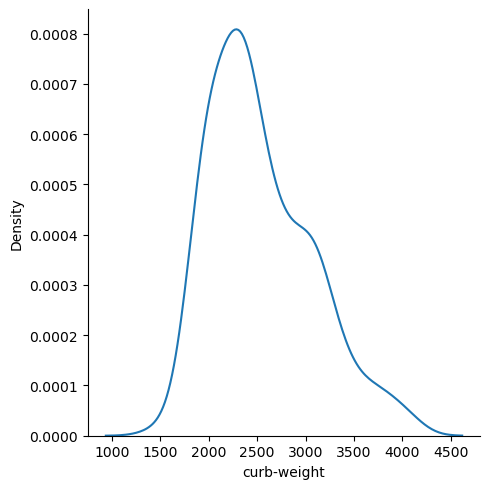

0.7641212662717332


<Figure size 640x480 with 0 Axes>

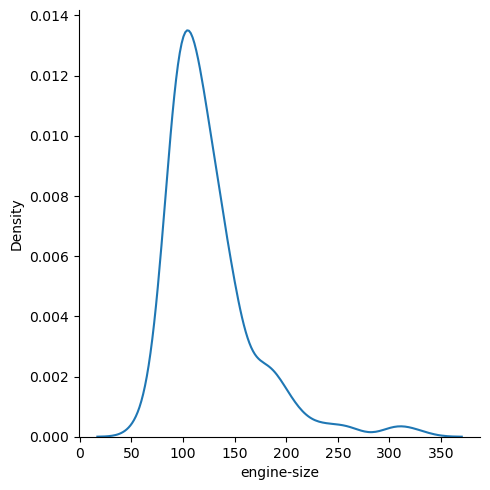

2.049450740475325


<Figure size 640x480 with 0 Axes>

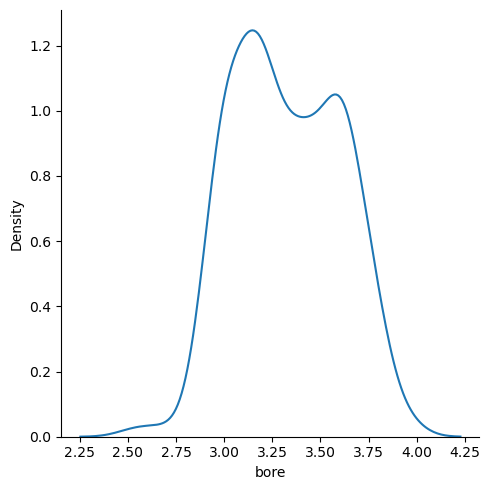

0.05309771375592927


<Figure size 640x480 with 0 Axes>

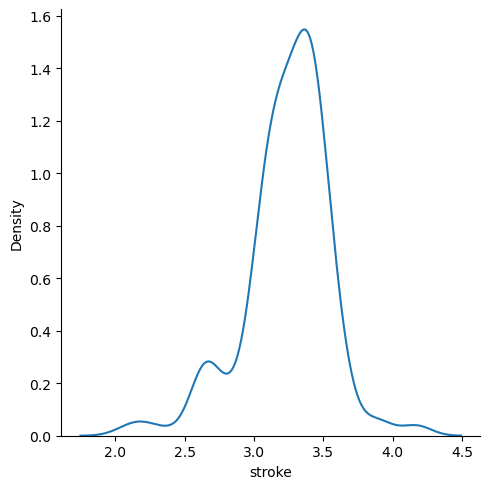

-0.77611856220413


<Figure size 640x480 with 0 Axes>

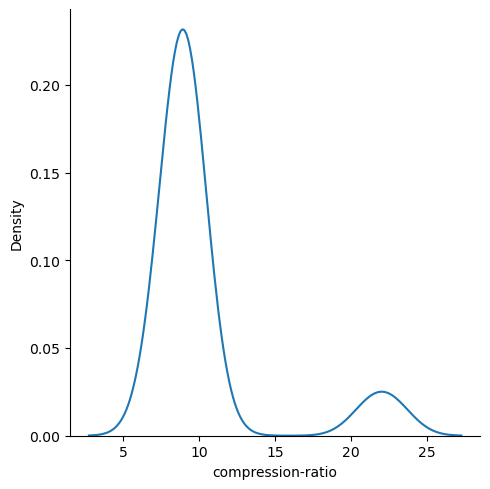

2.515214488340537


<Figure size 640x480 with 0 Axes>

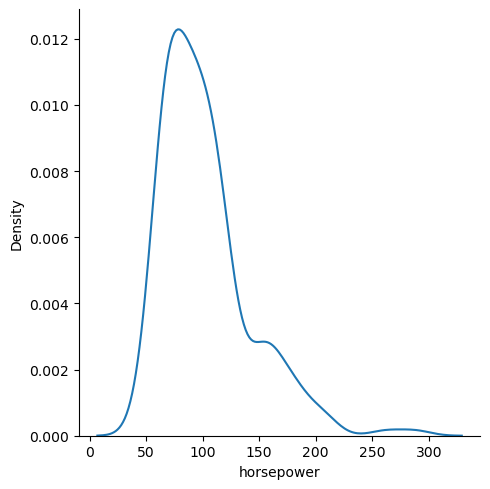

1.5600354394568041


<Figure size 640x480 with 0 Axes>

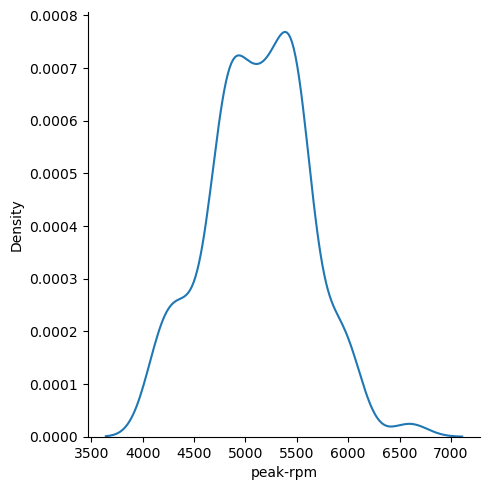

0.05190878151969575


<Figure size 640x480 with 0 Axes>

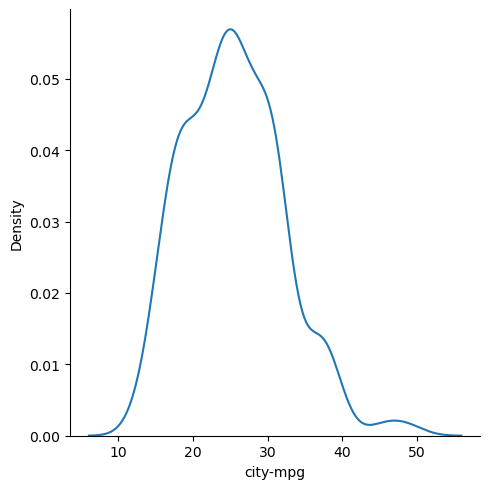

0.5864985669623732


<Figure size 640x480 with 0 Axes>

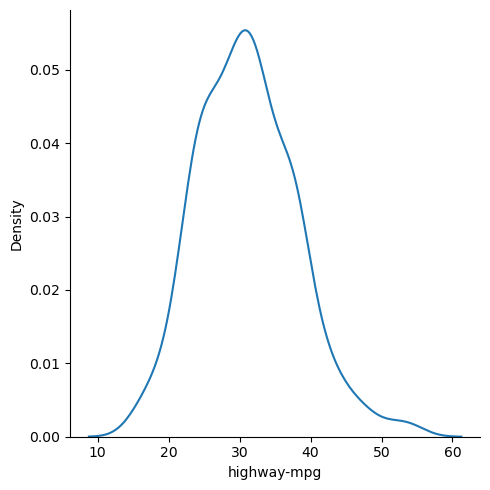

0.4611886241941842


<Figure size 640x480 with 0 Axes>

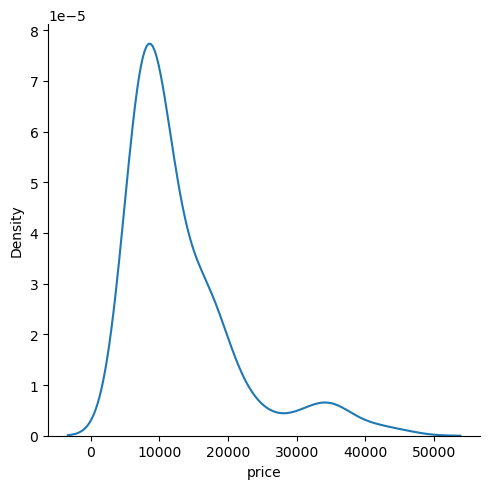

1.8222833048465967


In [48]:
for i in df_num.columns:
    plt.figure()
    sns.displot(df_num[i],kind='kde')
    plt.show()
    print(skew(df_num[i]))

In [49]:
# to find all the columns having skewness <-1 or >1
lst=[]
for i in df_num.columns:
    if skew(df_num[i])<-1 or skew(df_num[i])>1:
        lst.append(i)
print(lst)

['wheel-base', 'engine-size', 'compression-ratio', 'horsepower', 'price']


In [50]:
for i in lst:
    df_num[i]=np.log(df_num[i])

<Figure size 640x480 with 0 Axes>

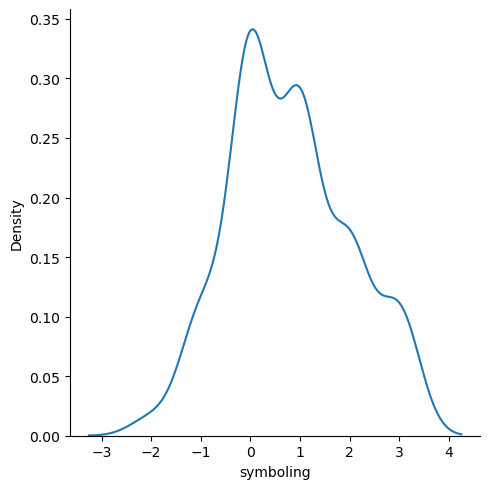

0.21386866184357742


<Figure size 640x480 with 0 Axes>

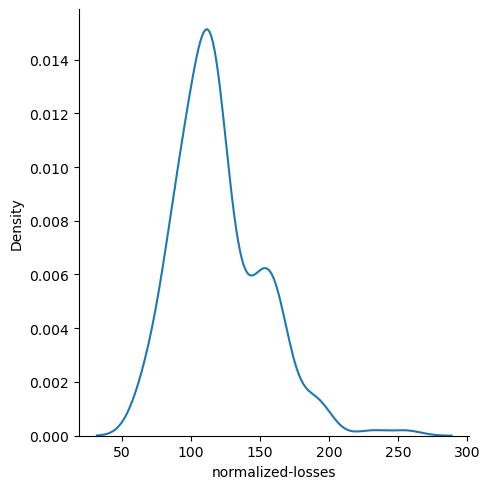

0.9632059441735282


<Figure size 640x480 with 0 Axes>

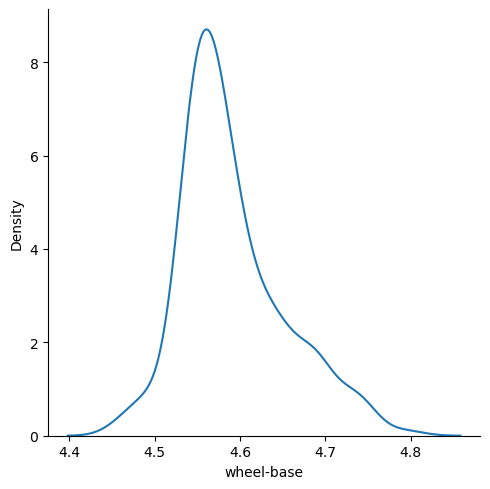

0.8797468352627346


<Figure size 640x480 with 0 Axes>

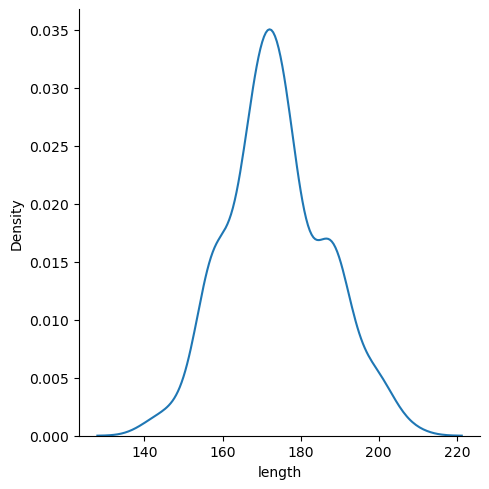

0.1902654850922912


<Figure size 640x480 with 0 Axes>

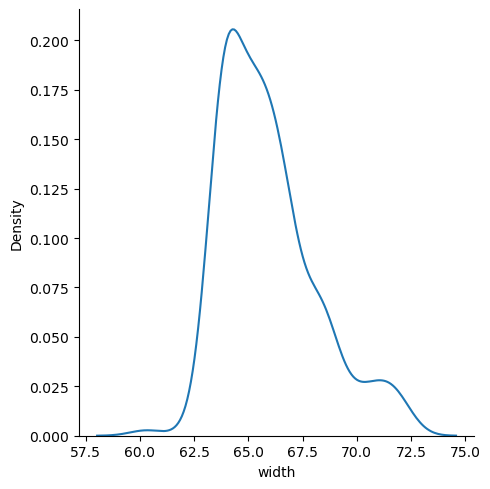

0.9470324898963965


<Figure size 640x480 with 0 Axes>

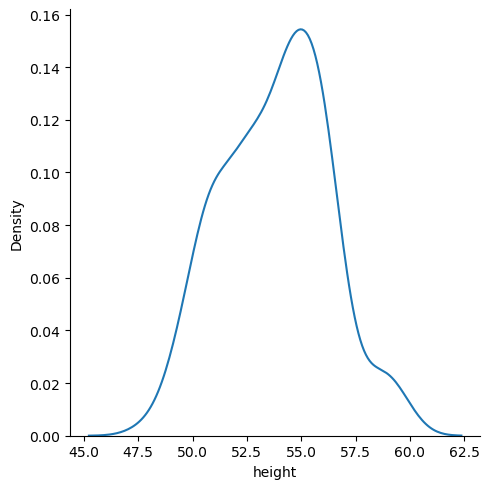

0.021147731594083348


<Figure size 640x480 with 0 Axes>

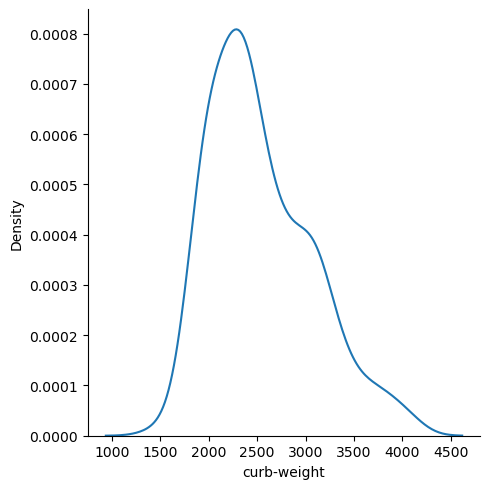

0.7641212662717332


<Figure size 640x480 with 0 Axes>

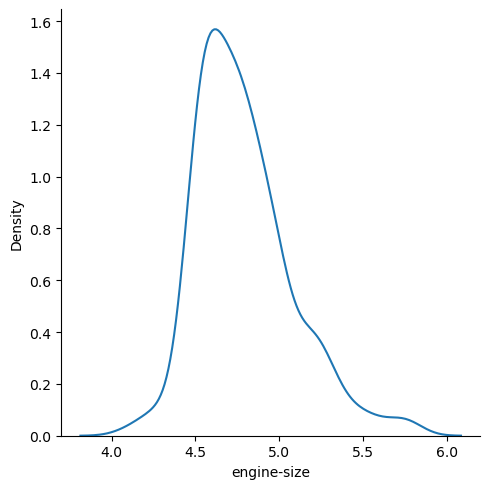

0.9677500061980684


<Figure size 640x480 with 0 Axes>

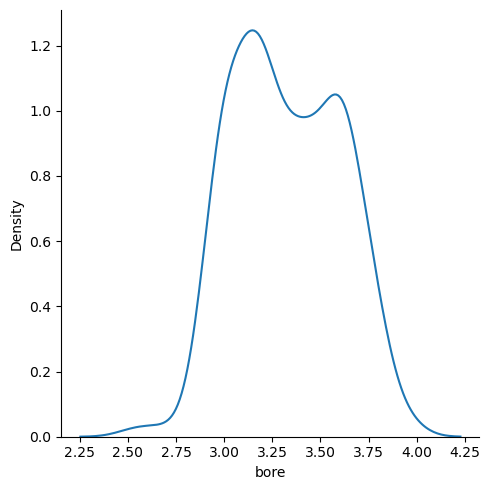

0.05309771375592927


<Figure size 640x480 with 0 Axes>

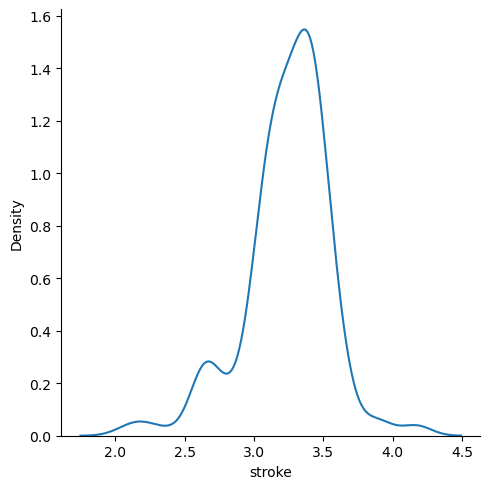

-0.77611856220413


<Figure size 640x480 with 0 Axes>

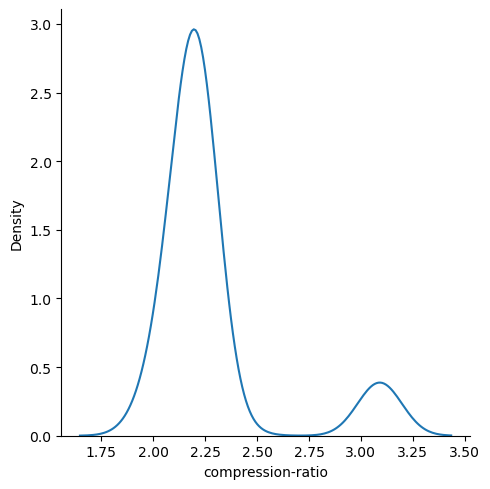

2.3068815407686794


<Figure size 640x480 with 0 Axes>

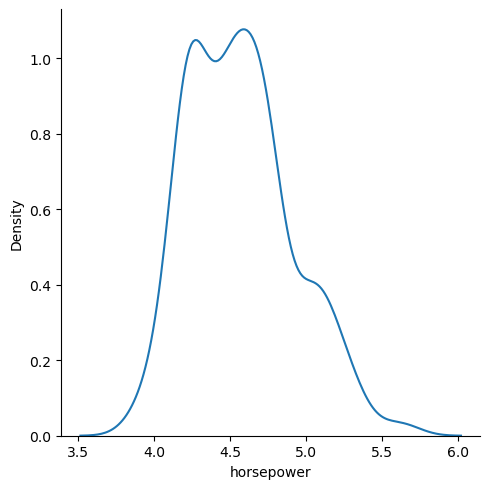

0.5838260570595406


<Figure size 640x480 with 0 Axes>

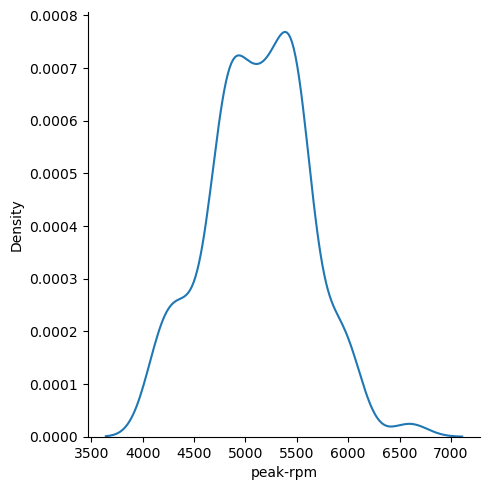

0.05190878151969575


<Figure size 640x480 with 0 Axes>

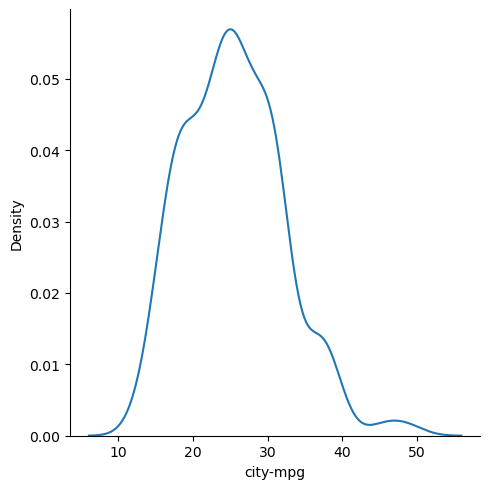

0.5864985669623732


<Figure size 640x480 with 0 Axes>

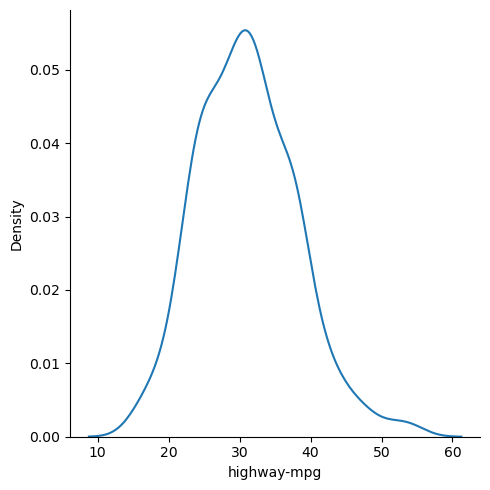

0.4611886241941842


<Figure size 640x480 with 0 Axes>

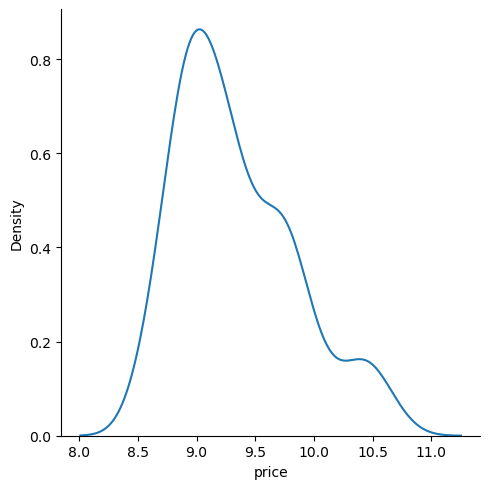

0.754550319520299


In [51]:
for i in df_num.columns:
    plt.figure()
    sns.displot(df_num[i],kind='kde')
    plt.show()
    print(skew(df_num[i]))

In [52]:
##  Using Scaling for numerical columns :
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(df_num)

In [53]:
x_scaled

array([[ 1.84617334, -0.16242308, -1.77114705, ..., -0.68044961,
        -0.58653114,  0.34244281],
       [ 1.84617334, -0.16242308, -1.77114705, ..., -0.68044961,
        -0.58653114,  0.74080709],
       [ 0.17644081, -0.16242308, -0.70017452, ..., -0.9839145 ,
        -0.73111442,  0.74080709],
       ...,
       [-1.49329173, -0.7989903 ,  1.68645739, ..., -1.13564694,
        -1.16486426,  1.26391413],
       [-1.49329173, -0.7989903 ,  1.68645739, ...,  0.0782126 ,
        -0.58653114,  1.35273727],
       [-1.49329173, -0.7989903 ,  1.68645739, ..., -0.9839145 ,
        -0.8756977 ,  1.36635895]])

<Figure size 640x480 with 0 Axes>

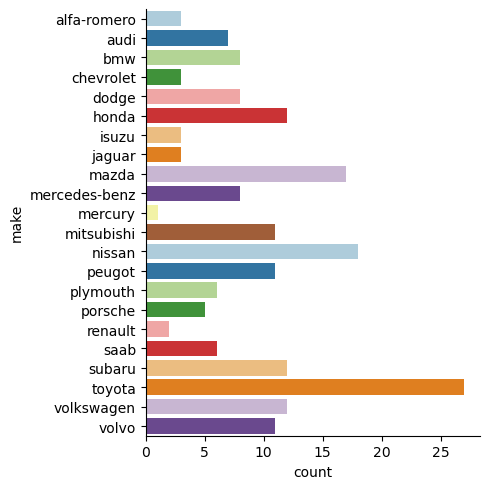

<Figure size 640x480 with 0 Axes>

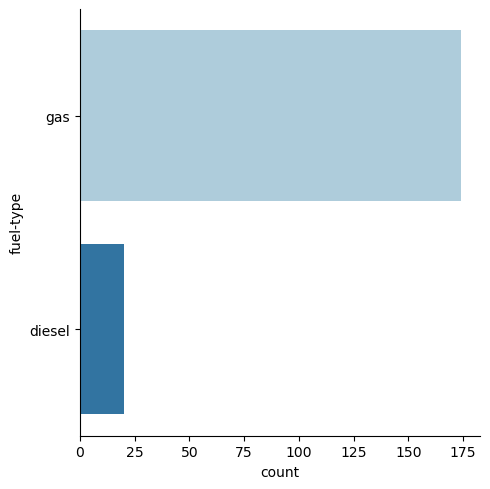

<Figure size 640x480 with 0 Axes>

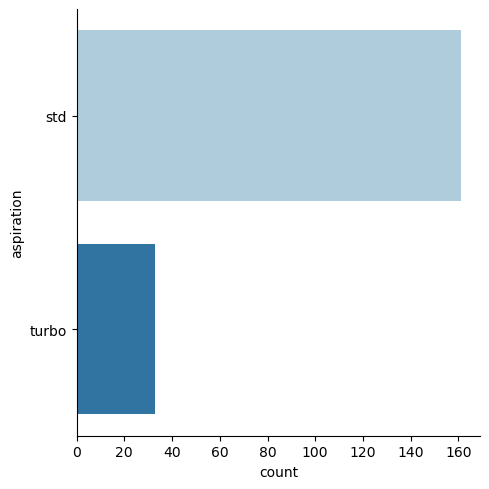

<Figure size 640x480 with 0 Axes>

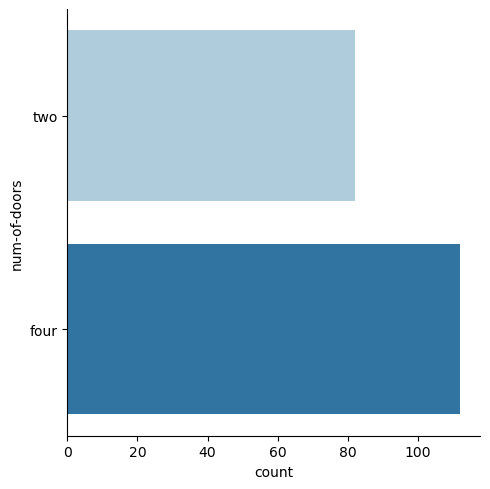

<Figure size 640x480 with 0 Axes>

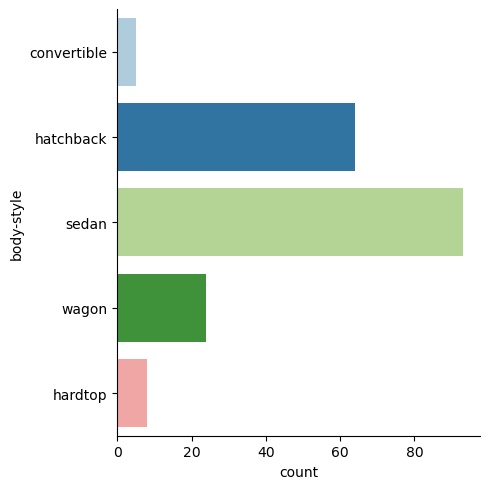

<Figure size 640x480 with 0 Axes>

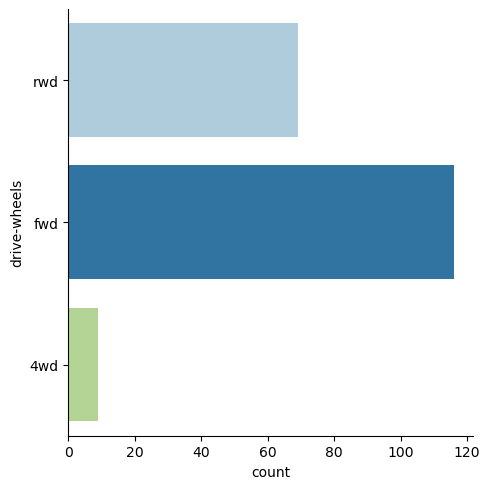

<Figure size 640x480 with 0 Axes>

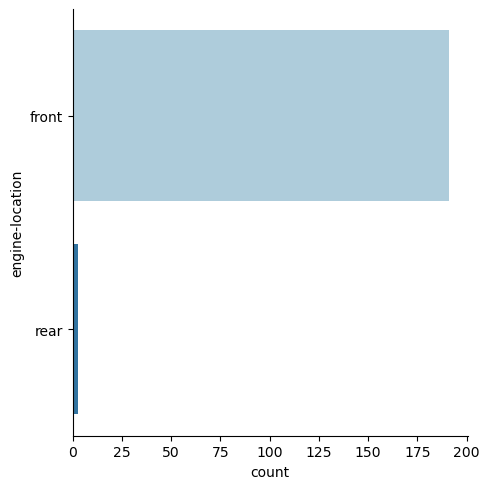

<Figure size 640x480 with 0 Axes>

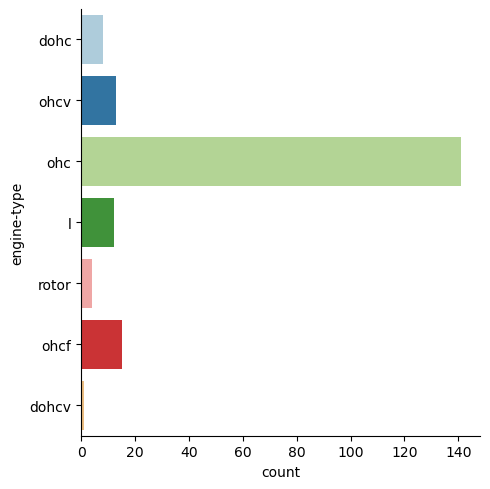

<Figure size 640x480 with 0 Axes>

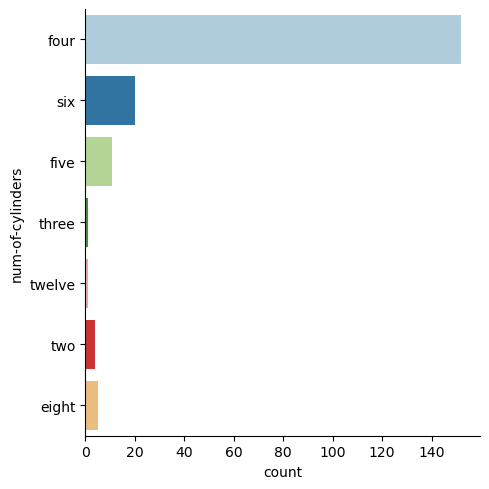

<Figure size 640x480 with 0 Axes>

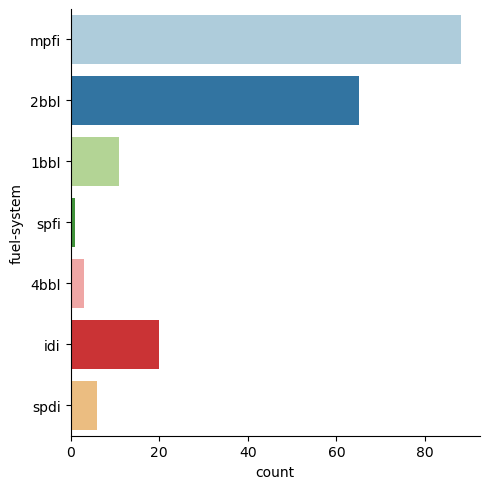

In [54]:
for i in df_cat.columns:
    plt.figure()
    sns.catplot(df_cat[i],kind='count',palette='Paired')
    plt.show()


In [55]:
# to do label encoding for categorical columns :
from sklearn.preprocessing import LabelEncoder
for i in df_cat:
    le=LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

In [56]:
df_cat.head()

make  fuel-type  aspiration  num-of-doors  body-style  drive-wheels  \
0     0          1           0             1           0             2   
1     0          1           0             1           0             2   
2     0          1           0             1           2             2   
3     1          1           0             0           3             1   
4     1          1           0             0           3             0   

   engine-location  engine-type  num-of-cylinders  fuel-system  
0                0            0                 2            4  
1                0            0                 2            4  
2                0            5                 3            4  
3                0            3                 2            4  
4                0            3                 1            4

In [57]:
#Pandas profiling library is used to do EDA of data
# !pip install ydata-profiling

Defaulting to user installation because normal site-packages is not writeable


In [59]:
# from ydata_profiling import ProfileReport
# report=ProfileReport(df1)
# report.to_file(output_file='oput.html')

In [60]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df,title='Trending')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
# ! jupyter nbextension enable --py widgetsnbextension

In [63]:
#pip install -U ipywidgets